In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

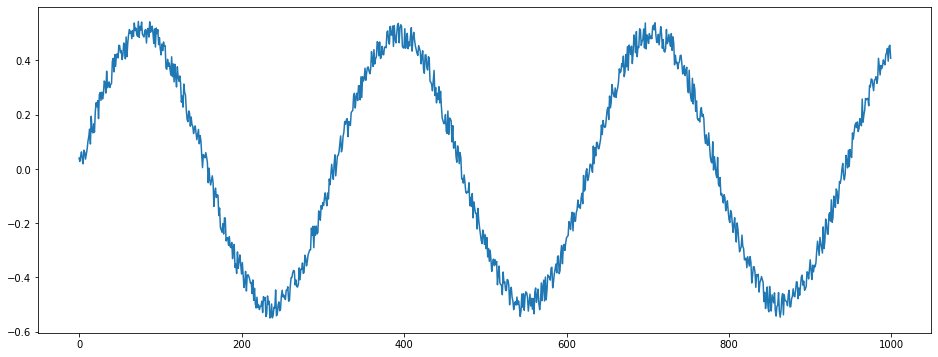

In [2]:
N = 1000 
t = np.arange(0, N)
data_sine = np.sin(0.02 * t)/2 + np.random.uniform(-0.05, 0.05, N) #عمدا نویز دادم که شبکه توی شرایط نویزی هم اوکی باشه
plt.figure(figsize=(16, 6))
plt.plot(data_sine)

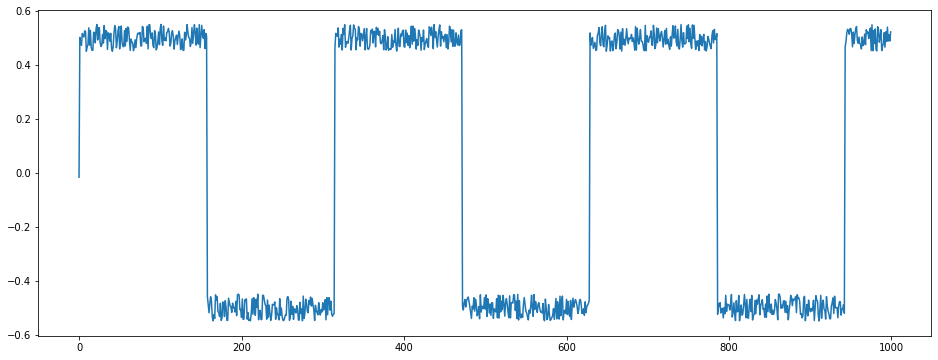

In [3]:
N = 1000 
t = np.arange(0, N)
data_square = np.sign(np.sin(0.02 * t))/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 6))
plt.plot(data_square)

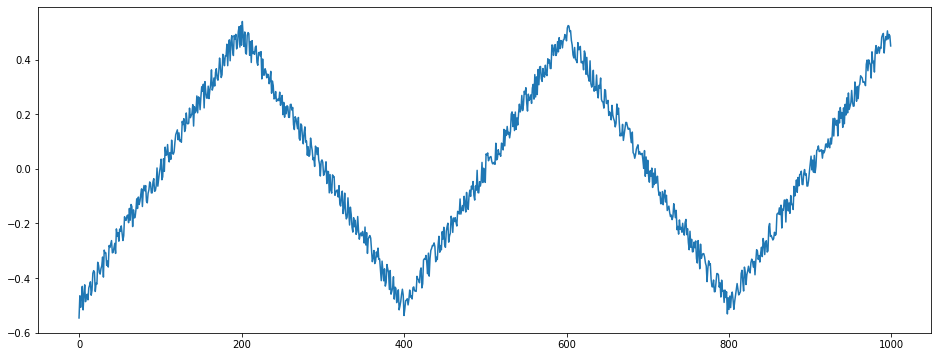

In [4]:
P = 200
A = 2

data_triangle = ((A/P) * (P - np.abs(t % (2*P) - P)) -1) / 2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 6))
plt.plot(data_triangle)

In [5]:
def conver_to_dataset(signal, step, label):
  X = []
  Y = []
  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(label)
  return np.array(X), np.array(Y)

In [6]:
X_sine, Y_sine = conver_to_dataset(data_sine, 40, 0) # شبکه ۴۰ تا رو می بینه بعد اظهار نظر می کنه
X_square, Y_square = conver_to_dataset(data_square, 40, 1)
X_triangle, Y_triangle = conver_to_dataset(data_triangle, 40, 2)

In [7]:
Y_sine.shape

(960,)

In [8]:
X = np.concatenate((X_sine, X_square, X_triangle), axis = 0)
Y = np.concatenate((Y_sine, Y_square, Y_triangle), axis = 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [13]:
model = tf.keras.models.Sequential([
                                    layers.SimpleRNN(units=64, input_shape=(None, 1)),
                                    layers.Dense(3, activation="softmax")
])

In [14]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [15]:
model.fit(X_train, Y_train, epochs=100, batch_size=16)

Epoch 1/100
144/144 [==============================] - 7s 26ms/step - loss: 1.0647 - accuracy: 0.4349
Epoch 2/100
144/144 [==============================] - 4s 27ms/step - loss: 0.9028 - accuracy: 0.5608
Epoch 3/100
144/144 [==============================] - 4s 26ms/step - loss: 0.8354 - accuracy: 0.6003
Epoch 4/100
144/144 [==============================] - 4s 26ms/step - loss: 0.8180 - accuracy: 0.5968
Epoch 5/100
144/144 [==============================] - 4s 26ms/step - loss: 0.7726 - accuracy: 0.6211
Epoch 6/100
144/144 [==============================] - 4s 27ms/step - loss: 0.7698 - accuracy: 0.6159
Epoch 7/100
144/144 [==============================] - 4s 26ms/step - loss: 0.7752 - accuracy: 0.6050
Epoch 8/100
144/144 [==============================] - 4s 25ms/step - loss: 0.8292 - accuracy: 0.5946
Epoch 9/100
144/144 [==============================] - 4s 25ms/step - loss: 0.8179 - accuracy: 0.6055
Epoch 10/100
144/144 [==============================] - 4s 26ms/step - loss: 0.776

In [17]:
model.evaluate(X_test, Y_test)

18/18 [==============================] - 0s 7ms/step - loss: 0.1958 - accuracy: 0.9167


[0.19581349194049835, 0.9166666865348816]

### Inference

In [21]:
classes = ['sine', 'square', 'triangle']

In [24]:
# sine

N = 40
t = np.arange(0, N)
x = np.sin(0.02 * t)/2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, N, 1) # ۱ اولی بچ هست و یک آخری برای اینپوت شیپ هست

result = model.predict(x)
print(classes[np.argmax(result)])

sine


In [25]:
# square

N = 40
t = np.arange(0, N)
x =  np.sign(np.sin(0.02 * t))/2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, N, 1)

result = model.predict(x)
print(classes[np.argmax(result)])

square


In [26]:
# triangle

N = 40
P = 200
A = 2
t = np.arange(0, N)

x = ((A/P) * (P - np.abs(t % (2*P) - P)) -1) / 2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = model.predict(x)
print(classes[np.argmax(result)])

triangle
